In [1]:
# Import libraries
import pickle
import http.client, urllib.parse
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import fastai.tabular.all as fastai
np.set_printoptions(linewidth=130)
import torch
import json

load_dotenv()
key = os.getenv('API_KEY')

# longLats pickle
def load_pkl():
  longLats = pickle.load(open('./longLat.pkl', 'rb'))
  print(f"longLats loaded. {len(longLats)}")
  return longLats
def dump_pkl(longLats):
    pickle.dump(longLats, open('./longLat.pkl', 'wb'))
    print(f"pickle dumped. {len(longLats)}")
longLats = load_pkl()

# clean up data: area, date, floor, price
def load_csv():
  #return pd.read_csv('./data/Woodlands_June22_May23.csv')
  return pd.read_csv('./data/resale-flat-from-jan-2017.csv')
floor_dict = { f'0{i*3+1} TO 0{i*3+3}' if i < 3 else f'{i*3+1} TO {i*3+3}': i*3+2  for i in range(17)  }
def floor_cleanup(df):
  df['floor'] = df.storey_range.apply(lambda x:float(floor_dict[x]) if isinstance(x,str) else x)
  df.drop(['storey_range'], axis=1, inplace=True)
  return df
date_dict = { f'20{17+i}-0{j+1}' if j < 9 else f'20{17+i}-{j+1}': i*12+j  for i in range(7) for j in range(12)  }
def date_cleanup(df):
  df['date'] = df.month.apply(lambda x:float(date_dict[x]) if isinstance(x,str) else x)
  df.drop(['month'], axis=1, inplace=True)
  return df
def load_and_cleanup():
  df = load_csv()
  df = floor_cleanup(df)
  df = date_cleanup(df)
  return df

df = load_and_cleanup()
df.describe()
date_max = df.date.max()
town = 'Bukit_Timah'
df = df[(df.town==town.replace('_', ' ').upper()) & (df.date > date_max-12)]

from pathlib import Path
file = Path(f'./data/{town}_June22_May23.csv')
df.to_csv(file,index=False)
df


longLats loaded. 4076


,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,floor,date
128155,BUKIT TIMAH,3 ROOM,8,EMPRESS RD,65.0,Improved,1976,52 years 11 months,368000.00,5.0,65.0
128156,BUKIT TIMAH,4 ROOM,2,QUEEN'S RD,89.0,Improved,1974,50 years 11 months,628000.00,2.0,65.0
128157,BUKIT TIMAH,4 ROOM,2,QUEEN'S RD,89.0,Improved,1974,50 years 11 months,600000.00,8.0,65.0
128158,BUKIT TIMAH,4 ROOM,3,QUEEN'S RD,91.0,Improved,1974,50 years 10 months,528000.00,5.0,65.0
130323,BUKIT TIMAH,3 ROOM,8,EMPRESS RD,76.0,Improved,1976,52 years 10 months,475000.00,14.0,66.0
130324,BUKIT TIMAH,3 ROOM,18,TOH YI DR,64.0,Simplified,1989,65 years 11 months,456000.00,5.0,66.0
130325,BUKIT TIMAH,4 ROOM,6,FARRER RD,91.0,Improved,1974,50 years 10 months,575000.00,2.0,66.0
130326,BUKIT TIMAH,4 ROOM,6,FARRER RD,91.0,Improved,1974,50 years 10 months,621888.00,11.0,66.0
130327,BUKIT TIMAH,4 ROOM,3,QUEEN'S RD,91.0,Improved,1974,50 years 10 months,560000.00,8.0,66.0
130328,BUKIT TIMAH,4 ROOM,17,TOH YI DR,104.0,Model A,1988,65 years 01 month,768000.00,5.0,66.0


In [2]:
blk_street = df.block + ' ' + df.street_name

longLats = load_pkl()
responses = []
errors = []
count = 0

conn = http.client.HTTPConnection('api.positionstack.com')
for i,add in enumerate(blk_street.unique()):
    params = urllib.parse.urlencode({
        'access_key': key,
        'query': add,
        'region': 'Singapore',
        'limit': 1,
    })
    conn.request('GET', '/v1/forward?{}'.format(params))
    res = conn.getresponse()
    data = res.read()
    dataList = json.loads(data.decode('utf-8'))['data']
    if (len(dataList)==0): 
      print(f"check {add}. No data returned")
      count += 1
      errors.append(add)
      continue
    first_response = dataList[0]
    responses.append(first_response)
    if (first_response['confidence'] > 0.9) and (first_response['country']=='Singapore'):
      longLats[f"{add}"] = (first_response['longitude'], first_response['latitude'])
      if (i%10==0): print(f"{i} of {len(blk_street.unique())}")
    else:
      print(f"check {add}. {first_response['label']}. confidence of {first_response['confidence']}")
      count += 1
      errors.append(add)

print(f"{count} errors detected")
dump_pkl(longLats)


longLats loaded. 4076
0 of 22
10 of 22
20 of 22
0 errors detected
pickle dumped. 4098


In [5]:
errors.sort()
errors

['1 JLN BT MERAH',
 '10 JLN BT HO SWEE',
 '10 JLN RUMAH TINGGI',
 '107 JLN BT MERAH',
 '108 JLN BT MERAH',
 '11 JLN BT MERAH',
 '113 JLN BT MERAH',
 '13 JLN BT MERAH',
 '131 JLN BT MERAH',
 '132 JLN BT MERAH',
 '133 JLN BT MERAH',
 '134 JLN BT MERAH',
 '135 JLN BT MERAH',
 '136 JLN BT MERAH',
 '137 JLN BT MERAH',
 '138 JLN BT MERAH',
 '139 JLN BT MERAH',
 '14 JLN BT MERAH',
 '140 JLN BT MERAH',
 '141 JLN BT MERAH',
 '142 JLN BT MERAH',
 '143 JLN BT MERAH',
 '146 JLN BT MERAH',
 '19 JLN MEMBINA',
 '2 JLN BT HO SWEE',
 '2 JLN BT MERAH',
 '20 JLN KLINIK',
 '20 JLN MEMBINA',
 '21 JLN MEMBINA',
 '22 JLN MEMBINA',
 '23 JLN MEMBINA',
 '26 JLN KLINIK',
 '28 JLN BT MERAH',
 '28 JLN KLINIK',
 '30 JLN KLINIK',
 '32 JLN BT HO SWEE',
 '34 JLN BT HO SWEE',
 '36 JLN RUMAH TINGGI',
 '37 JLN RUMAH TINGGI',
 '38 JLN RUMAH TINGGI',
 '4 JLN BT HO SWEE',
 '40 JLN RUMAH TINGGI',
 '46 JLN BT HO SWEE',
 '6 JLN BT HO SWEE',
 '7 JLN BT MERAH',
 '8 JLN RUMAH TINGGI',
 '9 JLN RUMAH TINGGI']

In [57]:
file = Path(f'./data/{town}_June22_May23_without_newest.csv')
df.to_csv(file,index=False)
df

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,floor,date
127994,BUKIT MERAH,1 ROOM,7,TELOK BLANGAH CRES,31.0,Improved,1975,51 years 10 months,248000.0,2.0,65.0
127995,BUKIT MERAH,2 ROOM,48,MOH GUAN TER,44.0,Standard,1973,49 years 07 months,432000.0,2.0,65.0
127996,BUKIT MERAH,2 ROOM,76,TELOK BLANGAH DR,44.0,Improved,1978,54 years 08 months,240000.0,8.0,65.0
127997,BUKIT MERAH,3 ROOM,119,BT MERAH VIEW,65.0,Improved,1983,59 years 08 months,325000.0,2.0,65.0
127998,BUKIT MERAH,3 ROOM,129,BT MERAH VIEW,65.0,Improved,1973,50 years 02 months,362000.0,11.0,65.0
...,...,...,...,...,...,...,...,...,...,...,...
152633,BUKIT MERAH,5 ROOM,74A,REDHILL RD,115.0,Improved,2005,81 years 07 months,898000.0,2.0,76.0
152634,BUKIT MERAH,5 ROOM,17,TELOK BLANGAH CRES,119.0,Improved,2002,77 years 09 months,850000.0,20.0,76.0
152635,BUKIT MERAH,5 ROOM,14A,TELOK BLANGAH CRES,119.0,Improved,1999,75 years 06 months,808000.0,8.0,76.0
152636,BUKIT MERAH,5 ROOM,26,TELOK BLANGAH CRES,114.0,Standard,1975,51 years 03 months,790000.0,8.0,76.0


In [3]:
def lat_long(df):
  adds = (df.block + ' ' + df.street_name)
  longLat = adds.apply(lambda x: longLats[x])
  df['long'] = longLat.apply(lambda x: x[0])
  df['lat'] = longLat.apply(lambda x: x[1])
  return df
lat_long(df)
df.describe()

,floor_area_sqm,lease_commence_date,resale_price,floor,date,long,lat
count,56.000000,56.000000,5.600000e+01,56.000000,56.000000,56.000000,56.000000
mean,100.089286,1980.821429,7.233773e+05,6.875000,69.803571,103.792601,1.328427
std,25.115932,7.198755,2.616313e+05,3.363237,3.321662,0.017747,0.009811
min,63.000000,1974.000000,3.680000e+05,2.000000,65.000000,103.772376,1.316327
25%,76.000000,1974.000000,5.185000e+05,5.000000,67.000000,103.774563,1.319050
50%,91.000000,1976.000000,6.249440e+05,5.000000,69.000000,103.805309,1.322827
75%,122.000000,1988.000000,8.582500e+05,11.000000,72.000000,103.808333,1.338602
max,154.000000,1989.000000,1.300000e+06,14.000000,76.000000,103.811603,1.339912


In [5]:
df

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,floor,date,long,lat
128155,BUKIT TIMAH,3 ROOM,8,EMPRESS RD,65.0,Improved,1976,52 years 11 months,368000.00,5.0,65.0,103.805309,1.316327
128156,BUKIT TIMAH,4 ROOM,2,QUEEN'S RD,89.0,Improved,1974,50 years 11 months,628000.00,2.0,65.0,103.811024,1.322801
128157,BUKIT TIMAH,4 ROOM,2,QUEEN'S RD,89.0,Improved,1974,50 years 11 months,600000.00,8.0,65.0,103.811024,1.322801
128158,BUKIT TIMAH,4 ROOM,3,QUEEN'S RD,91.0,Improved,1974,50 years 10 months,528000.00,5.0,65.0,103.811603,1.322827
130323,BUKIT TIMAH,3 ROOM,8,EMPRESS RD,76.0,Improved,1976,52 years 10 months,475000.00,14.0,66.0,103.805309,1.316327
130324,BUKIT TIMAH,3 ROOM,18,TOH YI DR,64.0,Simplified,1989,65 years 11 months,456000.00,5.0,66.0,103.773054,1.339912
130325,BUKIT TIMAH,4 ROOM,6,FARRER RD,91.0,Improved,1974,50 years 10 months,575000.00,2.0,66.0,103.808060,1.317322
130326,BUKIT TIMAH,4 ROOM,6,FARRER RD,91.0,Improved,1974,50 years 10 months,621888.00,11.0,66.0,103.808060,1.317322
130327,BUKIT TIMAH,4 ROOM,3,QUEEN'S RD,91.0,Improved,1974,50 years 10 months,560000.00,8.0,66.0,103.811603,1.322827
130328,BUKIT TIMAH,4 ROOM,17,TOH YI DR,104.0,Model A,1988,65 years 01 month,768000.00,5.0,66.0,103.772456,1.339644


In [6]:
dls = fastai.TabularDataLoaders.from_df(df,procs=[fastai.Normalize],cont_names=["floor", "floor_area_sqm", "lease_commence_date", "date", "lat","long"],y_names=["resale_price"])
#dls.show_batch()
def MSE(yhat,y):
  return torch.mean(torch.square(yhat-y))
def RMSE(yhat,y):
  return torch.sqrt(MSE(yhat,y))
learn = fastai.tabular_learner(dls,y_range=(df.resale_price.min()*0.95, df.resale_price.max()*1.05),loss_func=MSE,metrics=RMSE)
learn.lr_find(suggest_funcs=(fastai.valley,fastai.slide))


ZeroDivisionError: integer division or modulo by zero

In [11]:
learn = fastai.tabular_learner(
  dls,y_range=(df.resale_price.min()*0.95, df.resale_price.max()*1.05),
  loss_func=MSE,metrics=RMSE,
  cbs=[fastai.SaveModelCallback(),fastai.EarlyStoppingCallback(patience=5)]
)
learn.fit_one_cycle(100,5e-2)
learn.validate()


Better model found at epoch 0 with valid_loss value: 229683.25.


(#2) [52754395136.0,229683.25]

In [12]:
# predict prices on map
row = df.drop(['resale_price'], axis=1).iloc[0].copy()
cats = ['floor', 'floor_area_sqm', 'lease_commence_date', 'date']
for cat in cats:
  row[cat] = df[cat].median()
latMin, latMax = df.lat.min(),df.lat.max()
latLeft = latMin - (latMax-latMin)/10
latRight = latMax + (latMax-latMin)/10
longMin, longMax = df.long.min(),df.long.max()
longLeft = longMin - (longMax-longMin)/10
longRight = longMax + (longMax-longMin)/10
n1 = 9*15
n2 = 5*15
longs = np.linspace(longLeft, longRight, n1)
lats = np.linspace(latLeft, latRight, n2)
prices = np.ndarray((n2,n1))
for i,lat in enumerate(lats):
  if i%10==0: print(f"{i} of {n2}") 
  row['lat'] = lat
  for j,long in enumerate(longs):
    row['long'] = long
    with learn.no_bar(), learn.no_logging():
      _, yPred, _ = learn.predict(row)
      prices[i][j] = yPred.item()

0 of 75
10 of 75
20 of 75
30 of 75
40 of 75
50 of 75
60 of 75
70 of 75


In [13]:
import http.client, urllib.parse
import json

mrts = ["King Albert Park MRT", "Sixth Avenue MRT", "Tan Kah Kee MRT", "Botanic Gardens MRT", "Farrer Road MRT"]
longLats = load_pkl()

responses = []
for mrt in mrts:
	conn = http.client.HTTPConnection('api.positionstack.com')
	params = urllib.parse.urlencode({
		'access_key': key,
		'query': mrt[:-4] + ' Station',
		'region': 'Singapore',
		'limit': 1,
	})
	conn.request('GET', '/v1/forward?{}'.format(params))
	res = conn.getresponse()
	data = res.read()
	dataList = json.loads(data.decode('utf-8'))['data']
	if (len(dataList)==0): 
		print(f"check {add}. No data returned")
		count += 1
		errors.append(add)
		continue
	first_response = dataList[0]
	responses.append(first_response)
	if (first_response['confidence'] > 0.9) and (first_response['country']=='Singapore'):
		longLats[f"{mrt}"] = (first_response['longitude'], first_response['latitude'])
		print(f"{first_response['label']}, confidence {first_response['confidence']}")
	else:
		print(f"check {mrt}. {first_response['label']}. confidence of {first_response['confidence']}")

dump_pkl(longLats)


longLats loaded. 4099
King Albert Park Station, Singapore, confidence 1
check Sixth Avenue MRT. Sixth Avenue Station, Singapore. confidence of 0.8
Tan Kah Kee Station, Singapore, confidence 1
Botanic Gardens Station, Singapore, confidence 1
Farrer Road Station, Singapore, confidence 1
pickle dumped. 4103


In [17]:
#longLats['Sixth Avenue MRT']
longLats['Sixth Avenue MRT'] = (responses[1]['longitude'], responses[1]['latitude'])
dump_pkl(longLats)

pickle dumped. 4104


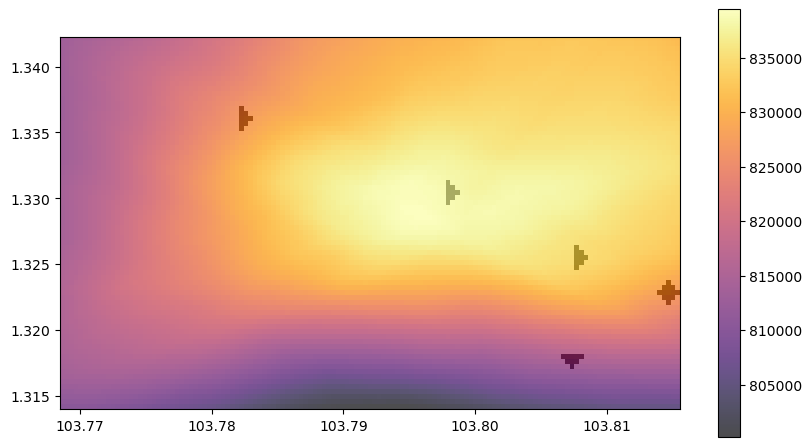

In [20]:
def min_coords(long,lat):
  return (np.abs((longs-long)).argmin(), np.abs(lats-lat).argmin())
def map_left(i,j):
  mrt_map[j-2][i+1]=1
  mrt_map[j-1][i+1]=1
  mrt_map[j-1][i]=1
  mrt_map[j][i]=1
  mrt_map[j][i-1]=1
  mrt_map[j][i+1]=1
  mrt_map[j+1][i]=1
  mrt_map[j+1][i+1]=1
  mrt_map[j+2][i+1]=1
def map_sq(i,j):
  mrt_map[j-1][i-1]=1
  mrt_map[j-1][i+1]=1
  mrt_map[j-1][i]=1
  mrt_map[j][i]=1
  mrt_map[j][i-1]=1
  mrt_map[j][i+1]=1
  mrt_map[j+1][i]=1
  mrt_map[j+1][i+1]=1
  mrt_map[j+1][i-1]=1
def map_right(i,j):
  mrt_map[j-2][i-1]=1
  mrt_map[j-1][i-1]=1
  mrt_map[j-1][i]=1
  mrt_map[j][i]=1
  mrt_map[j][i-1]=1
  mrt_map[j][i+1]=1
  mrt_map[j+1][i]=1
  mrt_map[j+1][i-1]=1
  mrt_map[j+2][i-1]=1
def map_up(i,j):
  mrt_map[j+1][i]=1
  mrt_map[j][i]=1
  mrt_map[j][i-1]=1
  mrt_map[j][i+1]=1
  mrt_map[j-1][i-2]=1
  mrt_map[j-1][i-1]=1
  mrt_map[j-1][i+2]=1
  mrt_map[j-1][i+1]=1
  mrt_map[j-1][i]=1
def map_down(i,j):
  mrt_map[j-1][i]=1
  mrt_map[j][i]=1
  mrt_map[j][i-1]=1
  mrt_map[j][i+1]=1
  mrt_map[j+1][i-2]=1
  mrt_map[j+1][i-1]=1
  mrt_map[j+1][i+2]=1
  mrt_map[j+1][i+1]=1
  mrt_map[j+1][i]=1
def map_star(i,j):
  mrt_map[j+1][i]=1
  mrt_map[j+1][i-1]=1
  mrt_map[j+1][i+1]=1
  mrt_map[j-1][i]=1
  mrt_map[j-1][i+1]=1
  mrt_map[j-1][i-1]=1
  mrt_map[j][i]=1
  mrt_map[j][i-1]=1
  mrt_map[j][i+1]=1
  mrt_map[j][i-2]=1
  mrt_map[j][i+2]=1
  mrt_map[j+2][i]=1
  mrt_map[j-2][i]=1
mrt_map = np.zeros((n2,n1))

map_right(*min_coords(*longLats[mrts[0]]))
map_right(*min_coords(*longLats[mrts[1]]))
map_right(*min_coords(*longLats[mrts[2]]))
#map_star(*min_coords(*longLats[mrts[3]]))
(i,j)= min_coords(*longLats[mrts[3]])
#mrt_map[j][i] = 1
map_star(i-2,j)
map_down(*min_coords(*longLats[mrts[4]]))

fig,ax=plt.subplots()
#mrt
#color map
shw2 = ax.imshow(mrt_map, extent=[longLeft, longRight, latLeft, latRight], origin='lower',cmap='Greys',alpha=1.0)
shw = ax.imshow(prices, extent=[longLeft, longRight, latLeft, latRight], origin='lower',alpha=0.7, cmap='inferno')
bar = plt.colorbar(shw)
fig.set_figwidth(10)
fig.set_figheight(10/n1*n2)

plt.show()

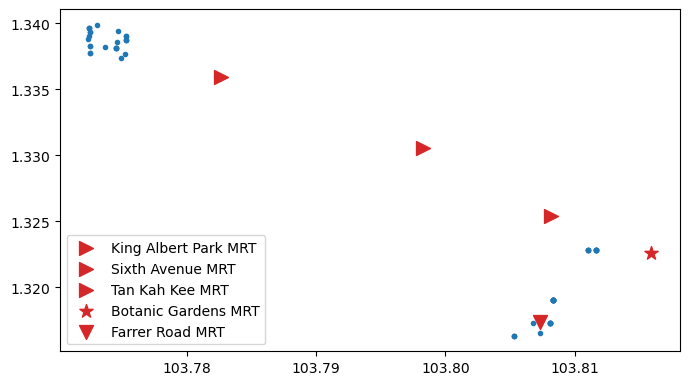

In [22]:
markers = [">", '>', ">", '*', 'v', '^', '^']

fig,ax2=plt.subplots()
ax2.scatter(df.long,df.lat,marker='.')
for i,mrt in enumerate(mrts):
  ax2.scatter([longLats[mrt][0]], [longLats[mrt][1]],marker=markers[i],c='#d62728',label=mrt,s=100)
ax2.legend(loc='lower left')
fig.set_figwidth(8)
fig.set_figheight(8/n1*n2)

plt.show()

for mrt in mrts:
  (i,j) = min_coords(*longLats[mrt])
